In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'y']
print(len(columns))
bank_df = pd.read_csv("../data/raw/bank+marketing/bank/bank-full.csv", sep=';')
bank_df = bank_df.replace('unknown', None)
# bank_df.dropna()

15


In [46]:
def plot_bars(df, column, figsize=(20, 6)):
    tmp_df = pd.DataFrame(df[column].value_counts())
    f, ax = plt.subplots(figsize=figsize)
    sns.barplot(tmp_df, x=column, y='count', label="Total")

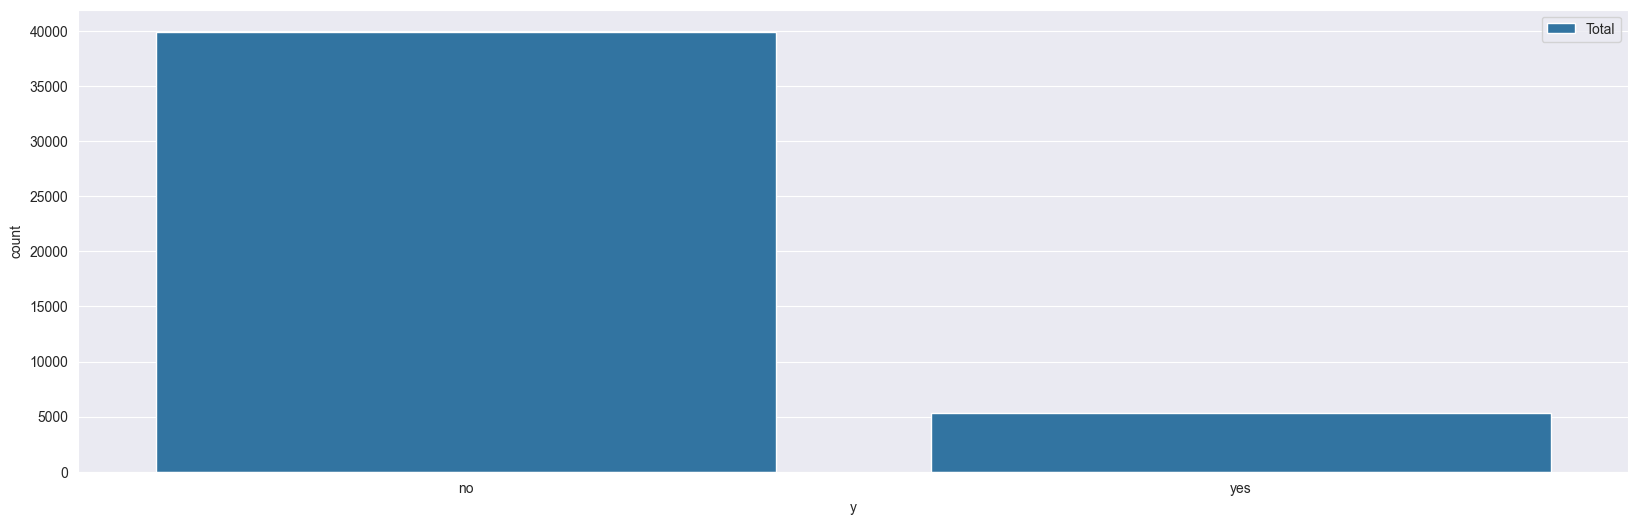

In [36]:
plot_bars(bank_df, 'y')

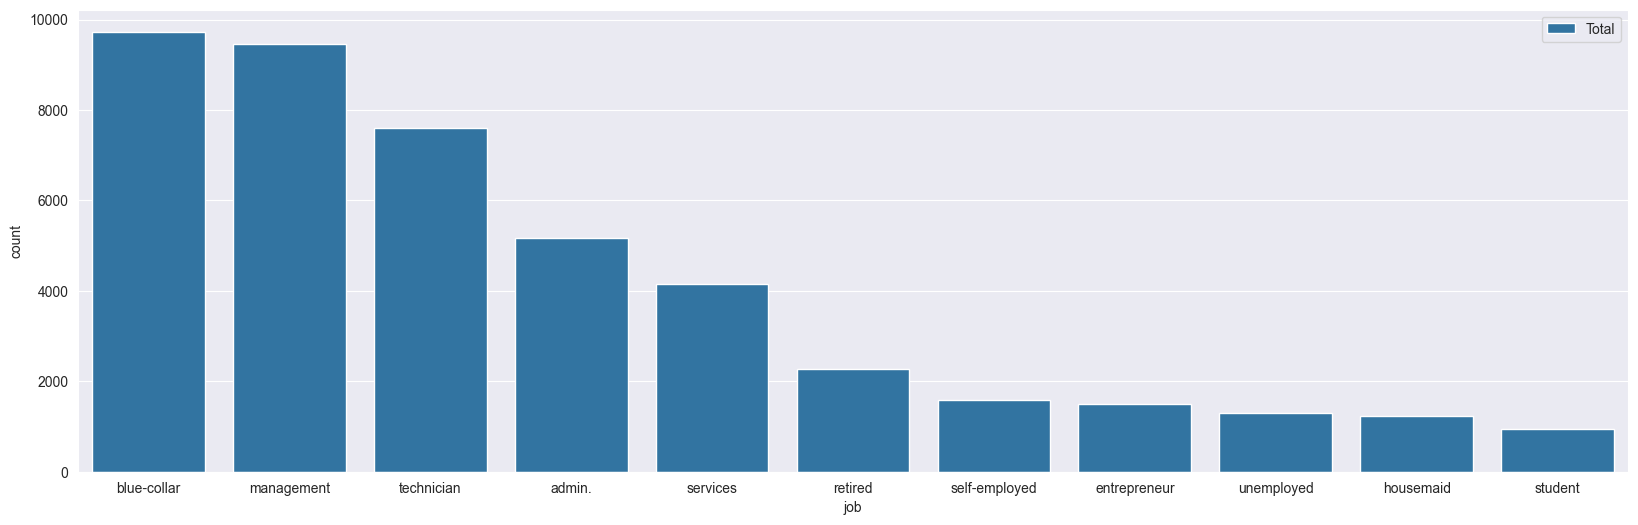

In [37]:
plot_bars(bank_df, 'job')

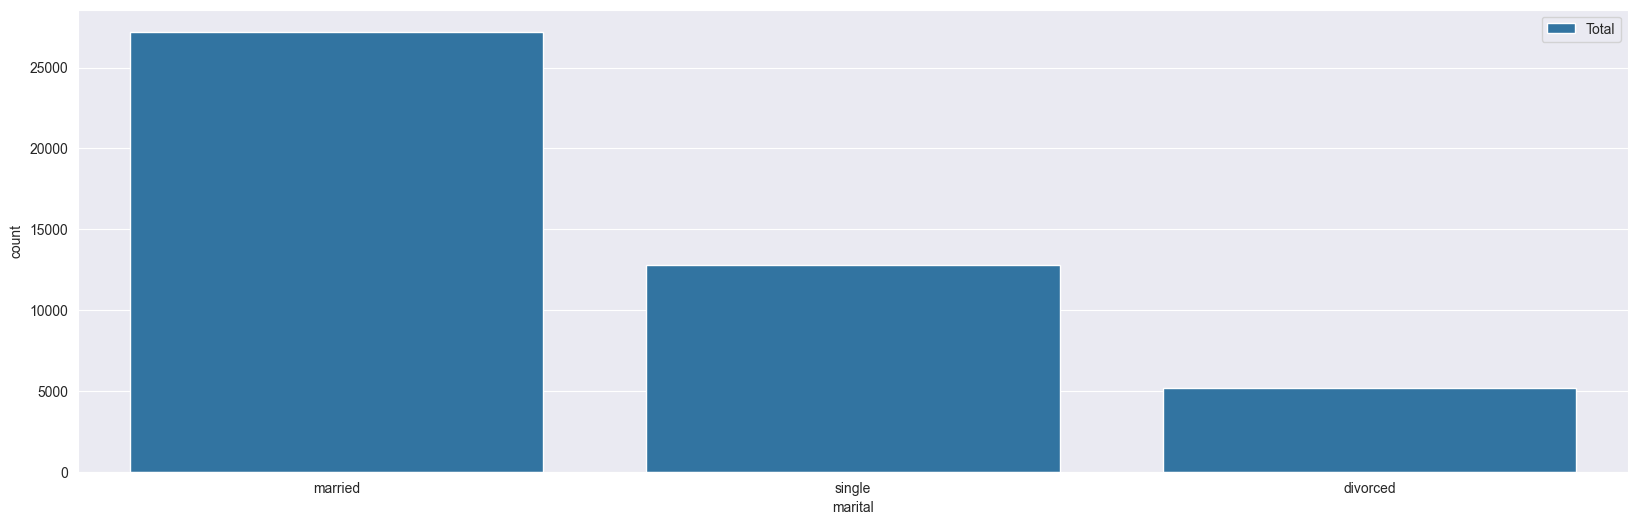

In [38]:
plot_bars(bank_df, 'marital')

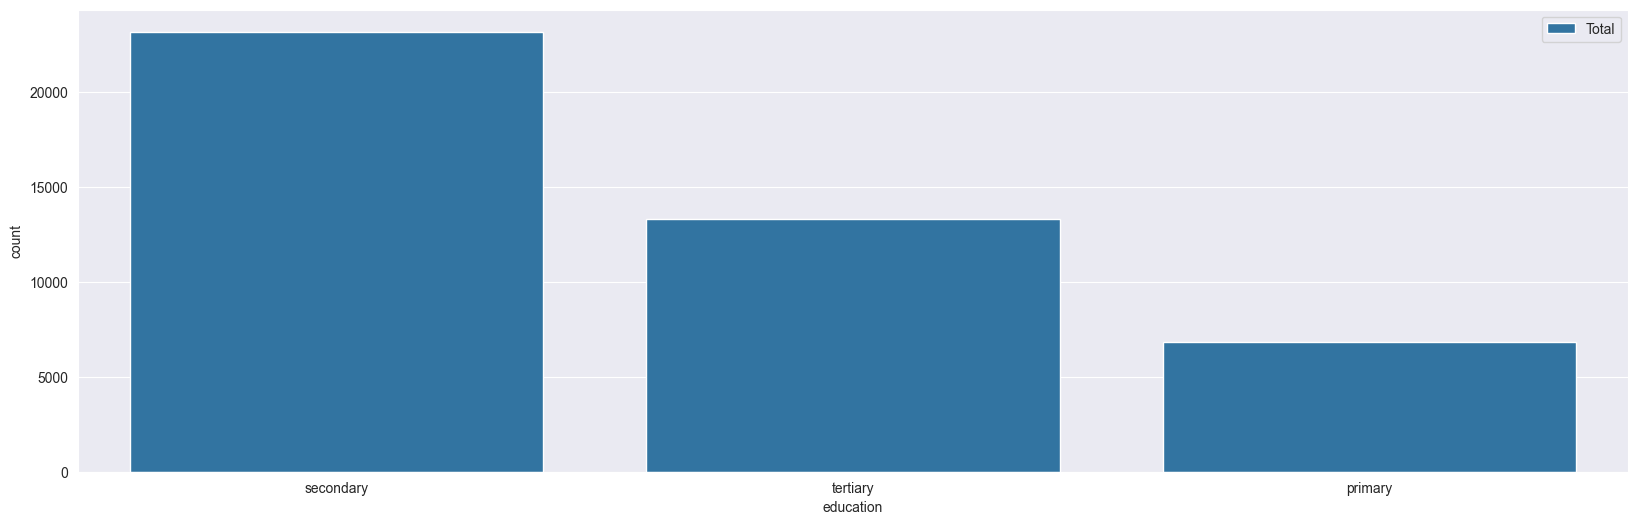

In [39]:
plot_bars(bank_df, 'education')

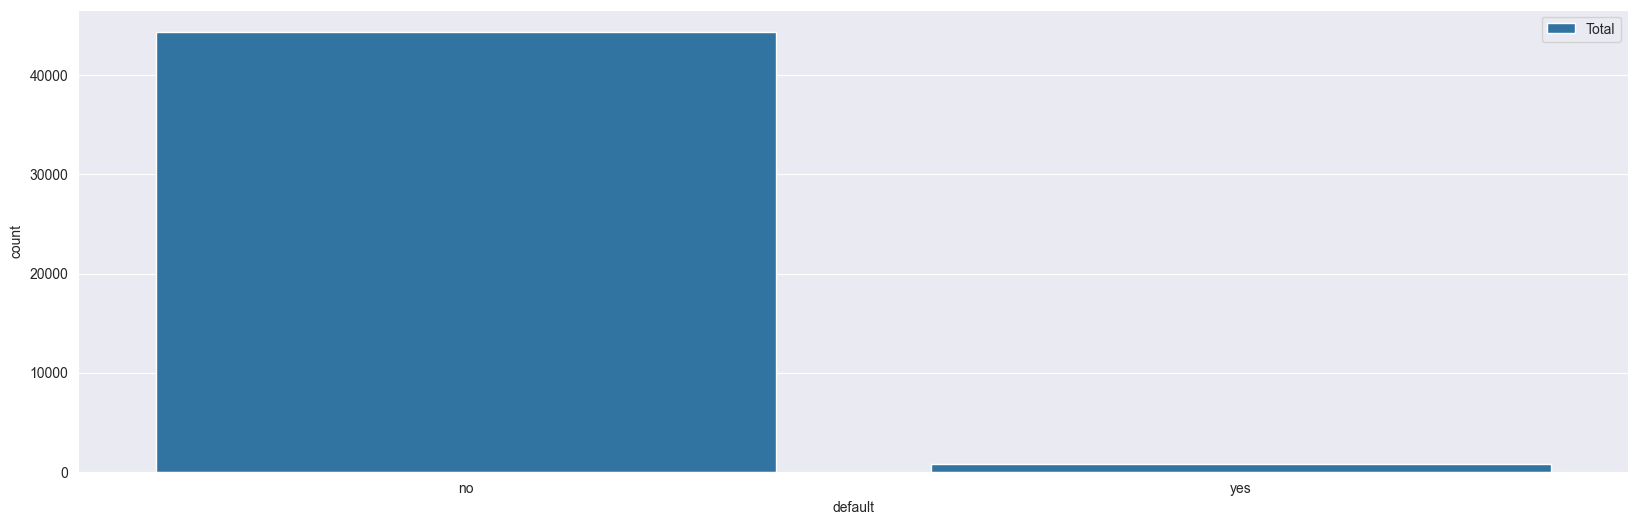

In [40]:
plot_bars(bank_df, 'default')

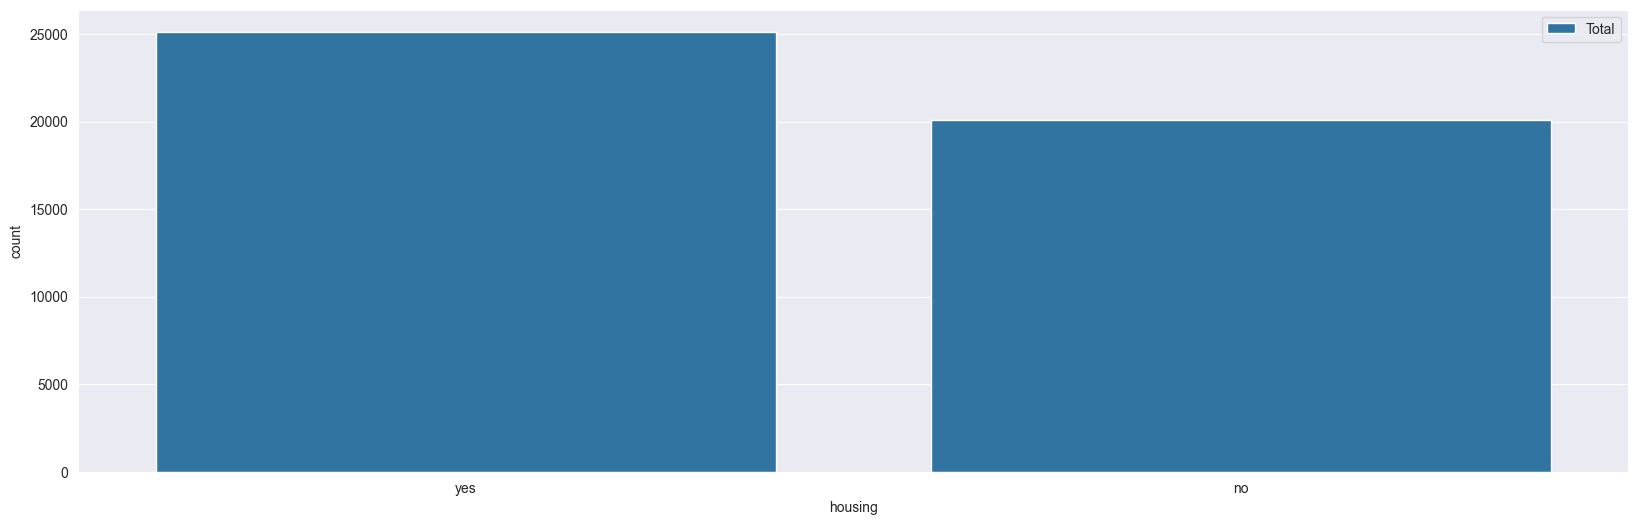

In [41]:
plot_bars(bank_df, 'housing')

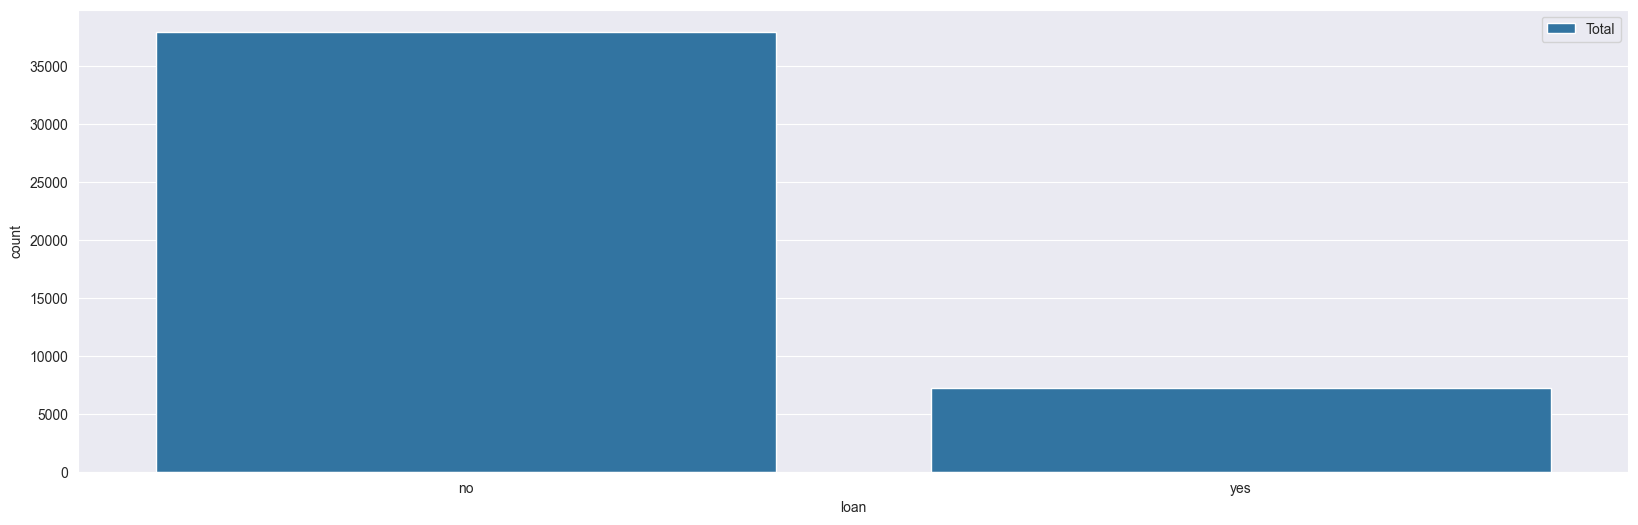

In [42]:
plot_bars(bank_df, 'loan')

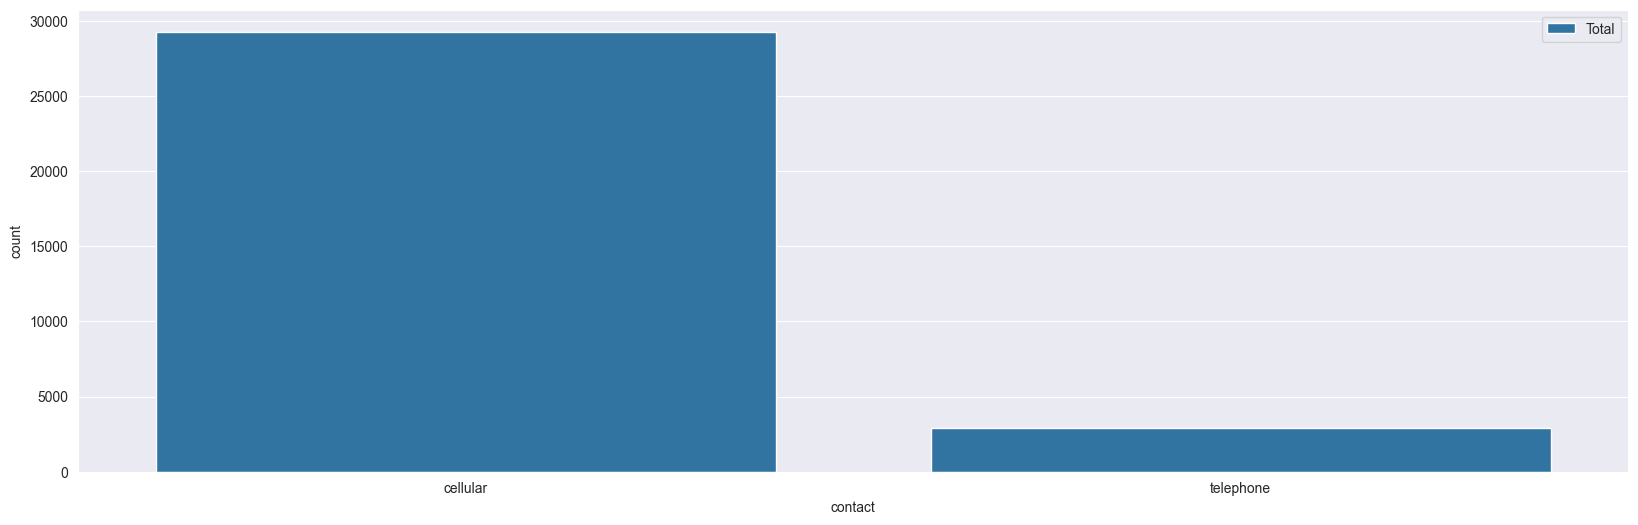

In [43]:
plot_bars(bank_df, 'contact')

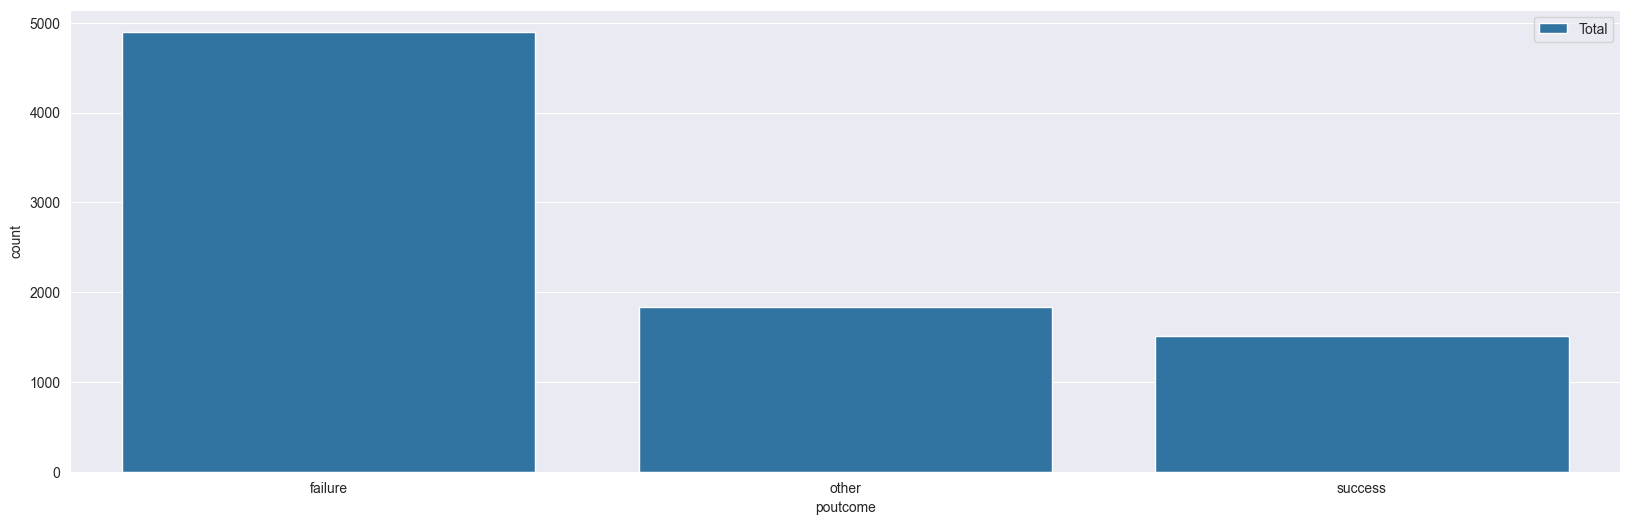

In [44]:
plot_bars(bank_df, 'poutcome')

<Axes: >

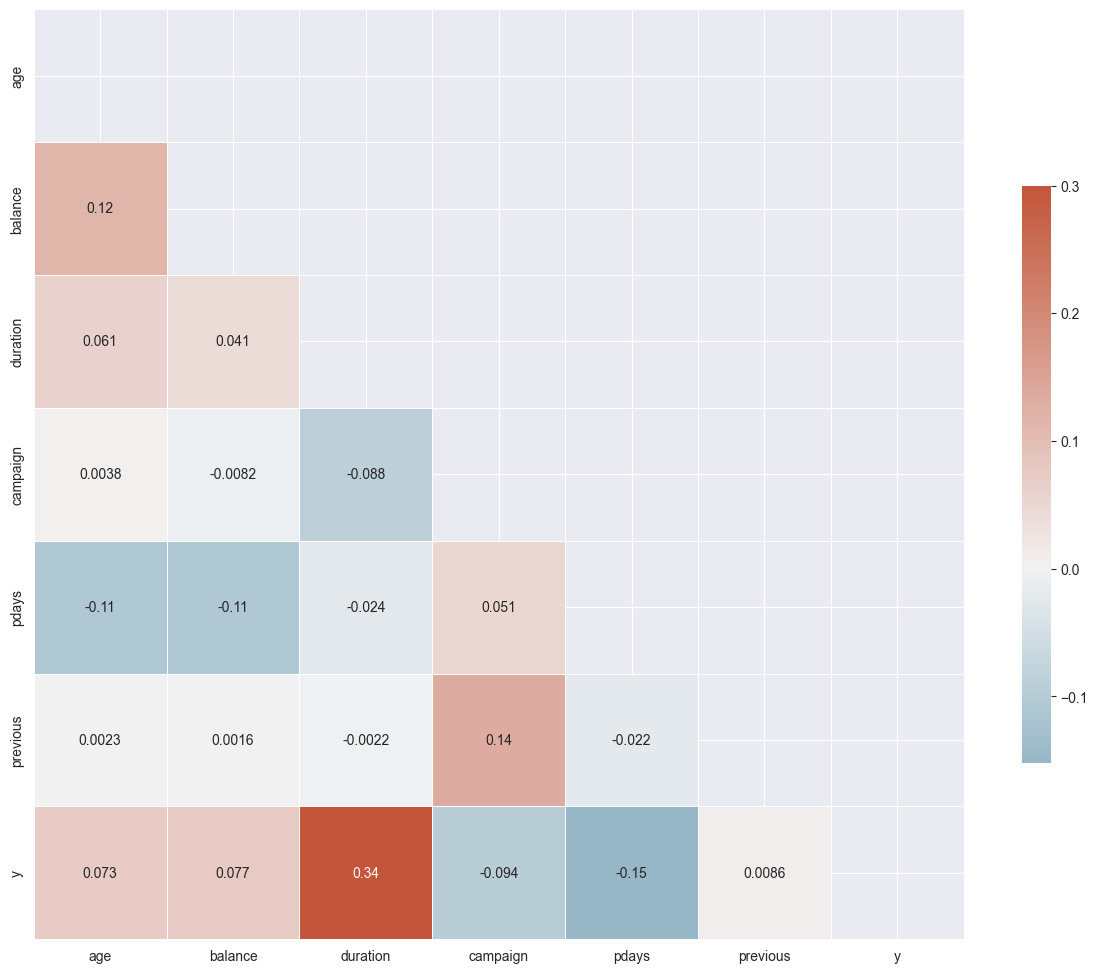

In [54]:
numerical_df = bank_df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'month', 'day'])
numerical_df['y'] = numerical_df['y'].map(lambda col: int(col == 'yes'))

# remove -1 from pdays column
mask = numerical_df['pdays'] == -1
numerical_df = numerical_df[~mask]

corr = numerical_df.corr()

f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
bank_df['duration'].sort_values(ascending=False)

24148    4918
9947     3881
44602    3785
19639    3422
2386     3366
         ... 
31740       1
44758       1
36425       0
22937       0
6424        0
Name: duration, Length: 45211, dtype: int64

In [63]:
bank_df.iloc[24148, :]

age                  59
job          technician
marital         married
education      tertiary
default              no
balance            6573
housing             yes
loan                 no
contact       telephone
day                  10
month               nov
duration           4918
campaign              1
pdays                -1
previous              0
poutcome           None
y                    no
Name: 24148, dtype: object